In [62]:
import os
import glob
import random
import json
import pandas as pd
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm,trange
import csv
# import torch
# import torchvision
# from torchvision import transforms
import matplotlib.pyplot as plt
from pandas import DataFrame

In [61]:
path = './aihub'

if os.path.isdir(path)==False: 
    os.makedirs(path+'/img')
else: print("exist_dir, plz check path_name ")

In [2]:
##경로 설정 
train_dir = ''# json파일이 있는 경로를 여기다 입력 
# img_train_dir = ''

In [11]:
#경로 확인 
glob.glob(train_dir+'/*')[0]


'./Validation\\1.간판'

In [ ]:
image = []
for i in tqdm(glob.glob(img_train_dir+"/*"),total= len(glob.glob(img_train_dir+'/*'))):
    image.append(Image.open(i)) #image 객체 image에 append

# crop 예시 

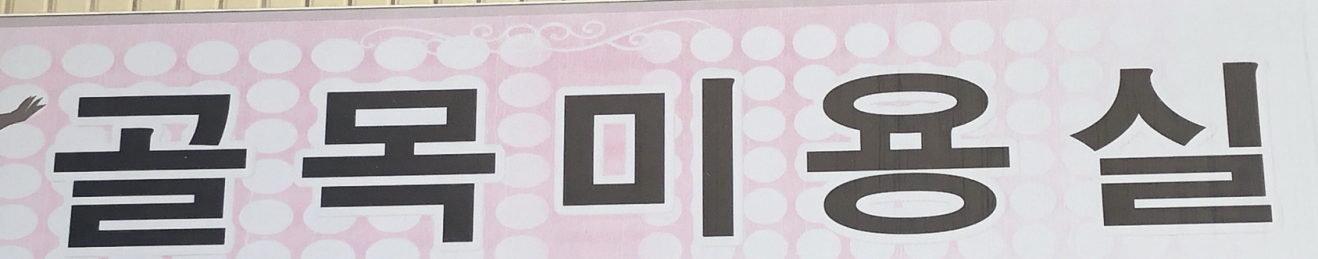

In [8]:
im = Image.open('./open/train/train_00001.png')
im

(100, 170)


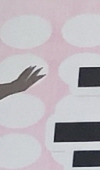

In [54]:
new_img = im.crop((0,30,100,200))
print(new_img.size)
new_img

# json파일 읽음 

In [4]:
json_list = []
for i in tqdm(glob.glob(train_dir+'/*/*/*'),total=len(glob.glob(train_dir+'/*/*/*'))):
    if i.split('.')[-1]=="zip":  continue
    else: 
        with open(i,encoding='utf8') as f:
            json_list.append(json.load(f))

  0%|          | 0/55945 [00:00<?, ?it/s]

# json 파일로부터 crop할 영역과 label추출

In [49]:
label = []
lotate  = []
for idx,i in tqdm(enumerate(json_list),total=len(json_list)):
    for jdx,j in enumerate(i['annotations']):
        lotate.append(j['bbox'])
        label.append(j['text'])

  0%|          | 0/55927 [00:00<?, ?it/s]

In [50]:
len(label), len(lotate)
#전체 len이 같아야 함 

(201835, 201835)

In [51]:
#좌표를 위해서 처리함 Image.crop은 left, top, right, under임 
#그러나 json은 x,y,width, height
for i in trange(len(lotate)):
    lotate[i][2] = lotate[i][0]+lotate[i][2]
    lotate[i][3] = lotate[i][1]+lotate[i][3]

  0%|          | 0/201835 [00:00<?, ?it/s]

In [56]:
print(f'{path}/train_data_1.jpg')

./aihub/train_data_1.jpg


In [ ]:
new_image = []
alpha = 0.5 #resize할 범위 만약 할거면 값 조정해서 resize해서 저장하면 됨 
for idx,i in tqdm(enumerate(lotate),total =len(lotate))
    crop_image = image[idx].crop(i)
    
    # crop_image.resize((crop_image.size[0]*alpha,crop_image.size[1]*alpha))#resize하고 싶은 비율 설정 
    crop_image.save(f'{path}/img/train_data_{idx}.jpg')

# label csv 생성 

In [63]:
path

'./aihub'

In [77]:
data = DataFrame(label)
data.to_csv(path+'/label.csv',sep=',',encoding='utf8',index=False)

In [68]:
####
###csv를 사용해서 만들때 
# with open(path+'/label.csv','w',encoding='utf8') as f:
#     write = csv.writer(f,delimiter='\n')
#     next(write)
#     write.writerows(label)

TypeError: '_csv.writer' object is not an iterator